<a href="https://colab.research.google.com/github/Ayombi/Phase-2-project/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Checkpoint

This checkpoint is designed to test your knowledge of time series analysis and modeling.

Specifically, this will cover:

* Using `pandas` to manipulate time series data
* Plotting time series data
* Modeling time series data with an ARMA model

## Data Understanding

The following dataset comes from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction). It includes energy usage data as well as temperature and humidity data.

The relevant columns for your analysis will be:

* `date`: A string representing the timestamp of measurements taken every 10 minutes
* `lights`: An integer representing energy use of light fixtures in the house in Wh

In [1]:
# Run this cell without changes
import pandas as pd

df = pd.read_csv("/content/energy_data.csv")
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


## 1. Create a `Series` Object for Analysis

As noted previously, we do not need all of the columns of `df`. Create a `pandas` `Series` object called `light_ts` which has an index of type `DatetimeIndex` generated based on the `date` column of `df` and data from the values of the `lights` column of `df`.

***Hint:*** The `pd.to_datetime` function ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)) can convert strings representing dates into datetimes

In [5]:
# Replace None with appropriate code
# Step 3: Select the relevant columns (date and lights)
df = df[['date', 'lights']]

# Step 4: Convert the date column to DatetimeIndex
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

light_ts = pd.Series(df['lights'])
# YOUR CODE HERE
#raise NotImplementedError()
light_ts

<ipython-input-5-496239cee9cd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


date
2016-01-11 17:00:00    30
2016-01-11 17:10:00    30
2016-01-11 17:20:00    30
2016-01-11 17:30:00    40
2016-01-11 17:40:00    40
                       ..
2016-03-23 15:40:00     0
2016-03-23 15:50:00    10
2016-03-23 16:00:00     0
2016-03-23 16:10:00     0
2016-03-23 16:20:00     0
Name: lights, Length: 10365, dtype: int64

In [6]:
# light_ts should be a Series
assert type(light_ts) == pd.Series

# light_ts should have the same number of records as df
assert light_ts.shape[0] == df.shape[0]

# The index of light_ts should be composed of datetimes
assert type(light_ts.index) == pd.DatetimeIndex

# PUT ALL WORK FOR THE ABOVE QUESTION ABOVE THIS CELL
# THIS UNALTERABLE CELL CONTAINS HIDDEN TESTS

## 2. Downsample Time Series Data to Find a Daily Total

Currently this dataset has recorded the amount of energy used every hour. We want to analyze the amount of energy used every day.

Create a `Series` called `daily_ts` which contains the data from `light_ts` downsampled using the frequency string for 1 **day**, then aggregated using the **sum** of daily energy use by the lights.

***Hint:*** Here is some relevant documentation:

* See [this page](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.resample.html#pandas.Series.resample) for information on the method used for upsampling and downsampling
* See [this page](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects) for the available frequency strings
* See [this page](https://pandas.pydata.org/docs/reference/resampling.html#computations-descriptive-stats) for the available aggregate functions to use after resampling

In [7]:
# Replace None with appropriate code
daily_ts = light_ts.resample('D').sum()
# YOUR CODE HERE
#raise NotImplementedError()
daily_ts

date
2016-01-11    1260
2016-01-12     610
2016-01-13     780
2016-01-14     720
2016-01-15     860
              ... 
2016-03-19     180
2016-03-20     130
2016-03-21     860
2016-03-22     350
2016-03-23      90
Freq: D, Name: lights, Length: 73, dtype: int64

In [8]:
# daily_ts should be a Series
assert type(daily_ts) == pd.Series

# daily_ts should have fewer records than light_ts
assert len(daily_ts) < len(light_ts)

# PUT ALL WORK FOR THE ABOVE QUESTION ABOVE THIS CELL
# THIS UNALTERABLE CELL CONTAINS HIDDEN TESTS

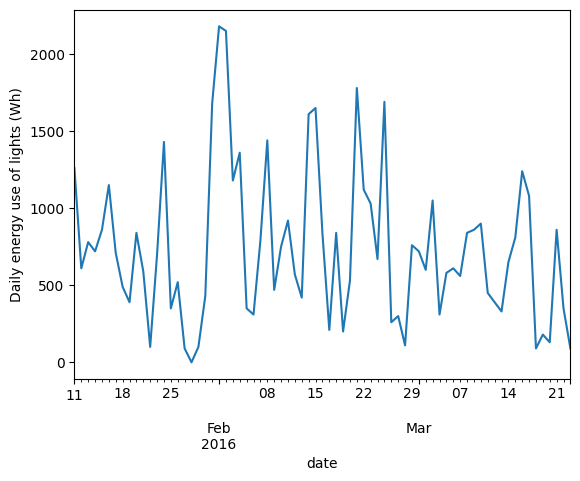

In [9]:
# Run this cell without changes
daily_ts.plot(ylabel="Daily energy use of lights (Wh)");

## 3. Check for Stationarity

Is this `daily_ts` time series stationary? You can answer this by interpreting the graph above, or using a statistical test ([documentation here](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html)) with an alpha of 0.05. Assign your answer to `is_stationary`.

In [10]:
# Replace None with appropriate code
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(daily_ts)

# Extract the p-value from the test result
p_value = result[1]

# Check if the time series is stationary based on the p-value and alpha level
alpha = 0.05
is_stationary = p_value <= alpha
# YOUR CODE HERE
#raise NotImplementedError()
is_stationary

False

In [11]:
# is_stationary should be True or False
assert (is_stationary == True or is_stationary == False)

# PUT ALL WORK FOR THE ABOVE QUESTION ABOVE THIS CELL
# THIS UNALTERABLE CELL CONTAINS HIDDEN TESTS

## 4. Find The Weekly Rolling Average of Time Series Data

Create a `Series` called `rolling_avg_ts` that represents the **weekly (7-day)** rolling **mean** of daily energy usage.

***Hint:*** See [this documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.rolling.html) for more information on calculating a rolling average.

(Note that it is expected that you'll see some NaN values at the beginning, when there have been fewer than 7 days to average.)

In [12]:
# Replace None with appropriate code
rolling_avg_ts = daily_ts.rolling(window=7).mean()
# YOUR CODE HERE
#raise NotImplementedError()
rolling_avg_ts

date
2016-01-11           NaN
2016-01-12           NaN
2016-01-13           NaN
2016-01-14           NaN
2016-01-15           NaN
                 ...    
2016-03-19    625.714286
2016-03-20    597.142857
2016-03-21    627.142857
2016-03-22    561.428571
2016-03-23    397.142857
Freq: D, Name: lights, Length: 73, dtype: float64

In [13]:
# rolling_avg_ts should be a Series
assert type(rolling_avg_ts) == pd.Series

# rolling_avg_ts should have the same number of records as daily_ts
assert len(rolling_avg_ts) == len(daily_ts)

# PUT ALL WORK FOR THE ABOVE QUESTION ABOVE THIS CELL
# THIS UNALTERABLE CELL CONTAINS HIDDEN TESTS

In the cell below, we plot the raw daily data, the 7-day moving average, and the difference between the raw daily data and the moving average.

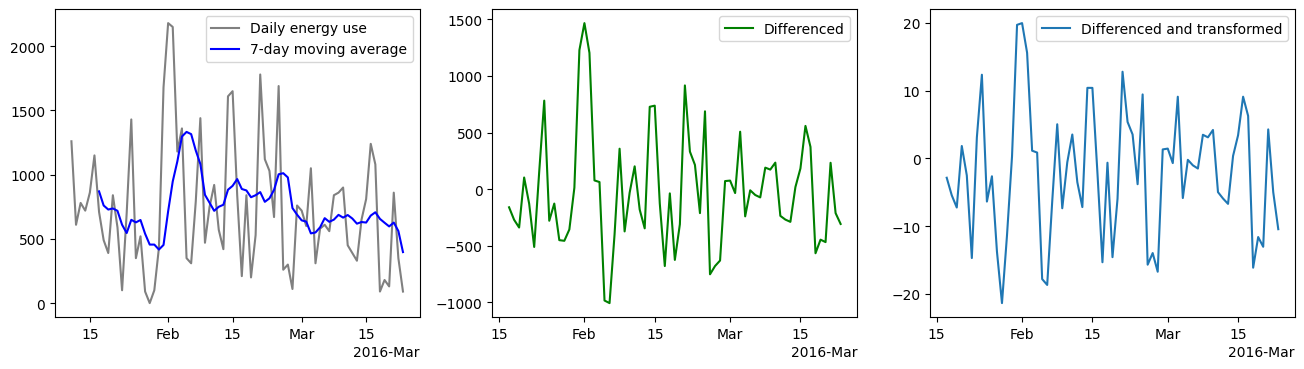

In [14]:
# Run this cell without changes

import matplotlib.pyplot as plt
from matplotlib.dates import AutoDateLocator, ConciseDateFormatter
import numpy as np

differenced_ts = daily_ts - rolling_avg_ts
differenced_ts.dropna(inplace=True)
differenced_transformed_ts = np.sqrt(daily_ts) - np.sqrt(rolling_avg_ts)
differenced_transformed_ts.dropna(inplace=True)

fig, axes = plt.subplots(ncols=3, figsize=(16,4))

axes[0].plot(daily_ts, color="gray", label="Daily energy use", )
axes[0].plot(rolling_avg_ts, color="blue", label="7-day moving average")
axes[1].plot(differenced_ts, color="green", label="Differenced")
axes[2].plot(differenced_transformed_ts, label="Differenced and transformed")

locator = AutoDateLocator()
formatter = ConciseDateFormatter(locator)

for ax in axes:
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    ax.legend()

## 5. Choose a Dataset and Build an AR(I)MA Model

Based on the plots above, choose the most-stationary time series data out of:

* `daily_ts`
* `differenced_ts`
* `differenced_transformed_ts`

And plug it into an AR(I)MA model ([documentation here](https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima.model.ARIMA.html))

You can use any order `(p, d, q)` that you want, so long as it doesn't produce a warning message.

In [16]:
# Replace None with appropriate code
from statsmodels.tsa.arima.model import ARIMA
p = 1  # Autoregressive (AR) order
d = 0  # Differencing (I) order (since the data is already stationary)
q = 1  # Moving Average (MA) order
model = ARIMA(daily_ts, order=(p, d, q))

#YOUR CODE HERE
#plementedError()

res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 lights   No. Observations:                   73
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -550.638
Date:                Sun, 16 Jun 2024   AIC                           1109.277
Time:                        19:51:17   BIC                           1118.439
Sample:                    01-11-2016   HQIC                          1112.928
                         - 03-23-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        739.3151    100.949      7.324      0.000     541.458     937.172
ar.L1          0.2198      0.290      0.758      0.448      -0.348       0.788
ma.L1          0.2014      0.313      0.643      0.520      -0.413       0.816
sigma2      2.153e+05   4.14e+04      5.195      0.000    1.34e+05    2.97e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.89
Prob(Q):                              0.97   Prob(JB):                         0.14
Heteroskedasticity (H):               0.45   Skew:                             0.56
Prob(H) (two-sided):                  0.05   Kurtosis:                         2.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
# model should be an ARIMA model
assert type(model) == ARIMA

# PUT ALL WORK FOR THE ABOVE QUESTION ABOVE THIS CELL
# THIS UNALTERABLE CELL CONTAINS HIDDEN TESTS